In [7]:
import pandas as pd
import re

In [8]:
f = open("chat.txt", 'r', encoding='utf-8')

In [9]:
data = f.read()


In [10]:
print(data)

13/07/2022, 9:01 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
13/07/2022, 9:01 pm - Vaibhav: 14 contacts.vcf (file attached)
13/07/2022, 9:02 pm - Vaibhav: 3 contacts.vcf (file attached)
13/07/2022, 9:09 pm - Vaibhav: Shlok & Tithi @radhe.vcf (file attached)
13/07/2022, 9:09 pm - Vaibhav: Digvijaysinh B. A @ Clg.vcf (file attached)
13/07/2022, 9:11 pm - Vaibhav: Priyanka Bhabhi B 602 Radhe.vcf (file attached)
13/07/2022, 9:50 pm - Yogesh Jio: <Media omitted>
13/07/2022, 9:51 pm - Vaibhav: Udadto nhi e
13/07/2022, 9:51 pm - Yogesh Jio: Kk
13/07/2022, 9:56 pm - Yogesh Jio: <Media omitted>
14/07/2022, 9:16 am - Vaibhav: Phochyo
14/07/2022, 9:25 am - Yogesh Jio: Ha
19/07/2022, 4:55 pm - Yogesh Jio: Kya chhe
30/07/2022, 11:52 am - Yogesh Jio: <Media omitted>
05/08/2022, 2:38 pm - Vaibhav: <Media omitted>
10/08/2022, 8:55 pm - Yogesh Jio: <Media omitted>
12/08/2022, 6:11 pm - Yogesh Jio: Misse

In [11]:
pattern = "\d{1,2}\/\d{1,2}\/\d{2,4},\s\d{1,2}:\d{1,2}\s?[ap]m\s-\s"

In [12]:
messages = re.split(pattern, data)[1:]

In [13]:
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Vaibhav: 14 contacts.vcf (file attached)\n',
 'Vaibhav: 3 contacts.vcf (file attached)\n',
 'Vaibhav: Shlok & Tithi @radhe.vcf (file attached)\n',
 'Vaibhav: Digvijaysinh B. A @ Clg.vcf (file attached)\n',
 'Vaibhav: Priyanka Bhabhi B 602 Radhe.vcf (file attached)\n',
 'Yogesh Jio: <Media omitted>\n',
 'Vaibhav: Udadto nhi e\n',
 'Yogesh Jio: Kk\n',
 'Yogesh Jio: <Media omitted>\n',
 'Vaibhav: Phochyo\n',
 'Yogesh Jio: Ha\n',
 'Yogesh Jio: Kya chhe\n',
 'Yogesh Jio: <Media omitted>\n',
 'Vaibhav: <Media omitted>\n',
 'Yogesh Jio: <Media omitted>\n',
 'Yogesh Jio: Missed video call\n',
 'Yogesh Jio: https://g.co/kgs/haabDG\n',
 'Yogesh Jio: Jage chhe??\n',
 'Vaibhav: [Name] Dilipbhai Istri Vara Sunsain\n[Mobile] 8734913275\n',
 'Yogesh Jio: Mom ne ke je ke mamra kari de\n',
 'Vaibhav: Ratlami leto avaje\n',
 'Vaibhav: Mamra nthi\n',
 'Yogesh

In [14]:
dates = re.findall(pattern, data)

In [15]:
dates[0]

'13/07/2022, 9:01\u202fpm - '

In [16]:
df=pd.DataFrame({'user_message': messages, 'message_date': dates})
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %I:%M %p - ')
df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-07-13 21:01:00
1,Vaibhav: 14 contacts.vcf (file attached)\n,2022-07-13 21:01:00
2,Vaibhav: 3 contacts.vcf (file attached)\n,2022-07-13 21:02:00
3,Vaibhav: Shlok & Tithi @radhe.vcf (file attach...,2022-07-13 21:09:00
4,Vaibhav: Digvijaysinh B. A @ Clg.vcf (file att...,2022-07-13 21:09:00


In [17]:
df.shape

(265, 2)

In [18]:
# separate user and message
users = []
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s', message)

    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)
df


,date,user,message
0,2022-07-13 21:01:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-07-13 21:01:00,Vaibhav,14 contacts.vcf (file attached)\n
2,2022-07-13 21:02:00,Vaibhav,3 contacts.vcf (file attached)\n
3,2022-07-13 21:09:00,Vaibhav,Shlok & Tithi @radhe.vcf (file attached)\n
4,2022-07-13 21:09:00,Vaibhav,Digvijaysinh B. A @ Clg.vcf (file attached)\n
...,...,...,...
260,2024-12-25 16:28:00,Yogesh Jio,
261,2024-12-29 19:29:00,Vaibhav,<Media omitted>\n
262,2024-12-31 21:51:00,Yogesh Jio,195582\n
263,2025-01-05 11:00:00,Vaibhav,https://drive.google.com/file/d/1iW9cphdHi-2XJ...


In [19]:
df['year'] = df['date'].dt.year
df

,date,user,message,year
0,2022-07-13 21:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022
1,2022-07-13 21:01:00,Vaibhav,14 contacts.vcf (file attached)\n,2022
2,2022-07-13 21:02:00,Vaibhav,3 contacts.vcf (file attached)\n,2022
3,2022-07-13 21:09:00,Vaibhav,Shlok & Tithi @radhe.vcf (file attached)\n,2022
4,2022-07-13 21:09:00,Vaibhav,Digvijaysinh B. A @ Clg.vcf (file attached)\n,2022
...,...,...,...,...
260,2024-12-25 16:28:00,Yogesh Jio,,2024
261,2024-12-29 19:29:00,Vaibhav,<Media omitted>\n,2024
262,2024-12-31 21:51:00,Yogesh Jio,195582\n,2024
263,2025-01-05 11:00:00,Vaibhav,https://drive.google.com/file/d/1iW9cphdHi-2XJ...,2025


In [20]:
df['month'] = df['date'].dt.month_name()
df

,date,user,message,year,month
0,2022-07-13 21:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,July
1,2022-07-13 21:01:00,Vaibhav,14 contacts.vcf (file attached)\n,2022,July
2,2022-07-13 21:02:00,Vaibhav,3 contacts.vcf (file attached)\n,2022,July
3,2022-07-13 21:09:00,Vaibhav,Shlok & Tithi @radhe.vcf (file attached)\n,2022,July
4,2022-07-13 21:09:00,Vaibhav,Digvijaysinh B. A @ Clg.vcf (file attached)\n,2022,July
...,...,...,...,...,...
260,2024-12-25 16:28:00,Yogesh Jio,,2024,December
261,2024-12-29 19:29:00,Vaibhav,<Media omitted>\n,2024,December
262,2024-12-31 21:51:00,Yogesh Jio,195582\n,2024,December
263,2025-01-05 11:00:00,Vaibhav,https://drive.google.com/file/d/1iW9cphdHi-2XJ...,2025,January


In [21]:
df['day'] = df['date'].dt.day
df

,date,user,message,year,month,day
0,2022-07-13 21:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,July,13
1,2022-07-13 21:01:00,Vaibhav,14 contacts.vcf (file attached)\n,2022,July,13
2,2022-07-13 21:02:00,Vaibhav,3 contacts.vcf (file attached)\n,2022,July,13
3,2022-07-13 21:09:00,Vaibhav,Shlok & Tithi @radhe.vcf (file attached)\n,2022,July,13
4,2022-07-13 21:09:00,Vaibhav,Digvijaysinh B. A @ Clg.vcf (file attached)\n,2022,July,13
...,...,...,...,...,...,...
260,2024-12-25 16:28:00,Yogesh Jio,,2024,December,25
261,2024-12-29 19:29:00,Vaibhav,<Media omitted>\n,2024,December,29
262,2024-12-31 21:51:00,Yogesh Jio,195582\n,2024,December,31
263,2025-01-05 11:00:00,Vaibhav,https://drive.google.com/file/d/1iW9cphdHi-2XJ...,2025,January,5


In [22]:
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df

,date,user,message,year,month,day,hour,minute
0,2022-07-13 21:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,July,13,21,1
1,2022-07-13 21:01:00,Vaibhav,14 contacts.vcf (file attached)\n,2022,July,13,21,1
2,2022-07-13 21:02:00,Vaibhav,3 contacts.vcf (file attached)\n,2022,July,13,21,2
3,2022-07-13 21:09:00,Vaibhav,Shlok & Tithi @radhe.vcf (file attached)\n,2022,July,13,21,9
4,2022-07-13 21:09:00,Vaibhav,Digvijaysinh B. A @ Clg.vcf (file attached)\n,2022,July,13,21,9
...,...,...,...,...,...,...,...,...
260,2024-12-25 16:28:00,Yogesh Jio,,2024,December,25,16,28
261,2024-12-29 19:29:00,Vaibhav,<Media omitted>\n,2024,December,29,19,29
262,2024-12-31 21:51:00,Yogesh Jio,195582\n,2024,December,31,21,51
263,2025-01-05 11:00:00,Vaibhav,https://drive.google.com/file/d/1iW9cphdHi-2XJ...,2025,January,5,11,0


In [23]:
words=[]
for message in df['message']:
    words.extend(message.split(' '))

words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.\n',
 '14',
 'contacts.vcf',
 '(file',
 'attached)\n',
 '3',
 'contacts.vcf',
 '(file',
 'attached)\n',
 'Shlok',
 '&',
 'Tithi',
 '@radhe.vcf',
 '(file',
 'attached)\n',
 'Digvijaysinh',
 'B.',
 'A',
 '@',
 'Clg.vcf',
 '(file',
 'attached)\n',
 'Priyanka',
 'Bhabhi',
 'B',
 '602',
 'Radhe.vcf',
 '(file',
 'attached)\n',
 '<Media',
 'omitted>\n',
 'Udadto',
 'nhi',
 'e\n',
 'Kk\n',
 '<Media',
 'omitted>\n',
 'Phochyo\n',
 'Ha\n',
 'Kya',
 'chhe\n',
 '<Media',
 'omitted>\n',
 '<Media',
 'omitted>\n',
 '<Media',
 'omitted>\n',
 'Missed',
 'video',
 'call\n',
 'https://g.co/kgs/haabDG\n',
 'Jage',
 'chhe??\n',
 '[Name]',
 'Dilipbhai',
 'Istri',
 'Vara',
 'Sunsain\n[Mobile]',
 '8734913275\n',
 'Mom',
 'ne',
 'ke',
 'je',
 'ke',
 'mamra',
 'kari',
 'de\n',
 

In [24]:
print(len(words))

658


In [25]:
df[df['message']=='<Media omitted>\n'].shape[0]

52

In [26]:
!pip install urlextract


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [27]:
from urlextract import URLExtract
urlExtract = URLExtract()
links = []
for m in df['message']:
    links.extend(urlExtract.find_urls(m))
print(links)

['https://g.co/kgs/haabDG', 'https://g.co/payinvite/6c3j31q', 'https://temp-mail.org/en/', 'https://t.jio/BournvitaTayyariJeetKi', 'https://app.stepsetgo.com/i/darsha853j', 'https://housing.com/pin-code/randesan-gandhinagar-pin-code-382007', 'https://m.youtube.com/premium?cc=r3svf9tt8vxnpv', 'https://cosmofeed.com/ps/6392f901769c870032ba6d76', 'https://docs.google.com/forms/d/e/1FAIpQLSfuA9iiQ39sfdkMp1oip1JvmZg8A8BDK4MUAeBWrUywsExT0g/viewform?usp=sf_link', 'https://nxstreaming.site/tvshows/', 'https://gpay.app.goo.gl/bzRfH7', 'https://gpay.app.goo.gl/Gcz7ek', 'https://gpay.app.goo.gl/AKwLtV', 'https://m.paytm.me/paytm_product?PID=357623398', 'https://gpay.app.goo.gl/CRvfg4', 'https://gpay.app.goo.gl/5P9P2g', 'https://drive.google.com/file/d/1iW9cphdHi-2XJf7LmTI4Sx5aoliFzsep/view?usp=drivesdk']


In [28]:
x = df['user'].value_counts().head()
x

user
Vaibhav               142
Yogesh Jio            122
group_notification      1
Name: count, dtype: int64

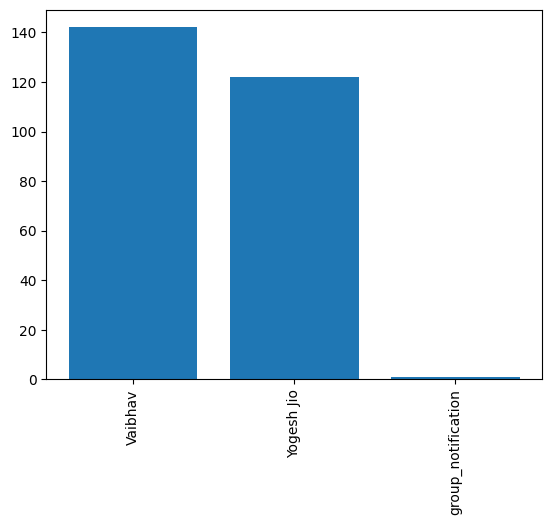

In [29]:
import matplotlib.pyplot as plt 
name = x.index
count = x.values
plt.bar(name, count)
plt.xticks(rotation='vertical')
plt.show()

In [30]:
round((df['user'].value_counts()/df.shape[0]) * 100, 2).reset_index().rename(columns={'user': 'name', 'count': 'percent'})

,name,percent
0,Vaibhav,53.58
1,Yogesh Jio,46.04
2,group_notification,0.38


In [31]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
df_wc = wc.generate(df['message'].str.cat(sep=" "))

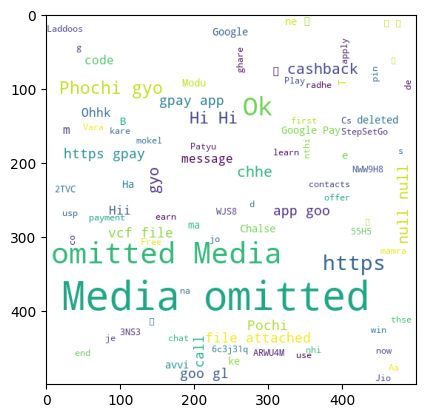

In [32]:
plt.imshow(df_wc)

In [33]:
temp = df[df['message']!= 'group_notification']
temp = temp[temp['message']!='<Media omitted>\n']
temp

,date,user,message,year,month,day,hour,minute
0,2022-07-13 21:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,July,13,21,1
1,2022-07-13 21:01:00,Vaibhav,14 contacts.vcf (file attached)\n,2022,July,13,21,1
2,2022-07-13 21:02:00,Vaibhav,3 contacts.vcf (file attached)\n,2022,July,13,21,2
3,2022-07-13 21:09:00,Vaibhav,Shlok & Tithi @radhe.vcf (file attached)\n,2022,July,13,21,9
4,2022-07-13 21:09:00,Vaibhav,Digvijaysinh B. A @ Clg.vcf (file attached)\n,2022,July,13,21,9
...,...,...,...,...,...,...,...,...
257,2024-12-11 18:33:00,Yogesh Jio,Pochi gyo ne\n,2024,December,11,18,33
258,2024-12-11 18:33:00,Yogesh Jio,?\n,2024,December,11,18,33
260,2024-12-25 16:28:00,Yogesh Jio,,2024,December,25,16,28
262,2024-12-31 21:51:00,Yogesh Jio,195582\n,2024,December,31,21,51


In [34]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
temp['message'] = temp['message'].apply(lambda m: m.replace('\n', ''))
temp

,date,user,message,year,month,day,hour,minute
0,2022-07-13 21:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,July,13,21,1
1,2022-07-13 21:01:00,Vaibhav,14 contacts.vcf (file attached),2022,July,13,21,1
2,2022-07-13 21:02:00,Vaibhav,3 contacts.vcf (file attached),2022,July,13,21,2
3,2022-07-13 21:09:00,Vaibhav,Shlok & Tithi @radhe.vcf (file attached),2022,July,13,21,9
4,2022-07-13 21:09:00,Vaibhav,Digvijaysinh B. A @ Clg.vcf (file attached),2022,July,13,21,9
...,...,...,...,...,...,...,...,...
257,2024-12-11 18:33:00,Yogesh Jio,Pochi gyo ne,2024,December,11,18,33
258,2024-12-11 18:33:00,Yogesh Jio,?,2024,December,11,18,33
260,2024-12-25 16:28:00,Yogesh Jio,,2024,December,25,16,28
262,2024-12-31 21:51:00,Yogesh Jio,195582,2024,December,31,21,51


In [36]:

words=[]
for m in temp['message']:
    for w in m.lower().split(' '):
        if w not in stop_words and w != '':
            words.append(w)


In [37]:
from collections import Counter
trial = pd.DataFrame(Counter(words).most_common(100))
trial[trial[0]=='https']

,0,1


In [38]:
!pip install emoji


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [39]:
import emoji
emojis=[]
for m in df['message']:
    emojis.extend([c for c in m if c in emoji.EMOJI_DATA])
emojis




['🤦', '♂', '🤦', '♂', '🤦', '♂', '🤦', '♂', '👌', '😎', '😎', '😎', '😅', '😅']

In [40]:
pd.DataFrame(Counter(emojis).most_common(20))

,0,1
0,🤦,4
1,♂,4
2,😎,3
3,😅,2
4,👌,1


In [41]:
df


,date,user,message,year,month,day,hour,minute
0,2022-07-13 21:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,July,13,21,1
1,2022-07-13 21:01:00,Vaibhav,14 contacts.vcf (file attached)\n,2022,July,13,21,1
2,2022-07-13 21:02:00,Vaibhav,3 contacts.vcf (file attached)\n,2022,July,13,21,2
3,2022-07-13 21:09:00,Vaibhav,Shlok & Tithi @radhe.vcf (file attached)\n,2022,July,13,21,9
4,2022-07-13 21:09:00,Vaibhav,Digvijaysinh B. A @ Clg.vcf (file attached)\n,2022,July,13,21,9
...,...,...,...,...,...,...,...,...
260,2024-12-25 16:28:00,Yogesh Jio,,2024,December,25,16,28
261,2024-12-29 19:29:00,Vaibhav,<Media omitted>\n,2024,December,29,19,29
262,2024-12-31 21:51:00,Yogesh Jio,195582\n,2024,December,31,21,51
263,2025-01-05 11:00:00,Vaibhav,https://drive.google.com/file/d/1iW9cphdHi-2XJ...,2025,January,5,11,0


In [42]:
df['month_num'] = df['date'].dt.month
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()
timeline

,year,month_num,month,message
0,2022,7,July,14
1,2022,8,August,5
2,2022,9,September,14
3,2022,10,October,66
4,2022,11,November,31
5,2022,12,December,14
6,2023,1,January,4
7,2023,2,February,1
8,2023,3,March,2
9,2023,4,April,1


In [43]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+' - '+ str(timeline['year'][i]))
time

['July - 2022',
 'August - 2022',
 'September - 2022',
 'October - 2022',
 'November - 2022',
 'December - 2022',
 'January - 2023',
 'February - 2023',
 'March - 2023',
 'April - 2023',
 'May - 2023',
 'June - 2023',
 'July - 2023',
 'August - 2023',
 'September - 2023',
 'October - 2023',
 'November - 2023',
 'December - 2023',
 'February - 2024',
 'March - 2024',
 'April - 2024',
 'May - 2024',
 'June - 2024',
 'July - 2024',
 'August - 2024',
 'September - 2024',
 'October - 2024',
 'November - 2024',
 'December - 2024',
 'January - 2025']

In [44]:
timeline['time'] = time
timeline

,year,month_num,month,message,time
0,2022,7,July,14,July - 2022
1,2022,8,August,5,August - 2022
2,2022,9,September,14,September - 2022
3,2022,10,October,66,October - 2022
4,2022,11,November,31,November - 2022
5,2022,12,December,14,December - 2022
6,2023,1,January,4,January - 2023
7,2023,2,February,1,February - 2023
8,2023,3,March,2,March - 2023
9,2023,4,April,1,April - 2023


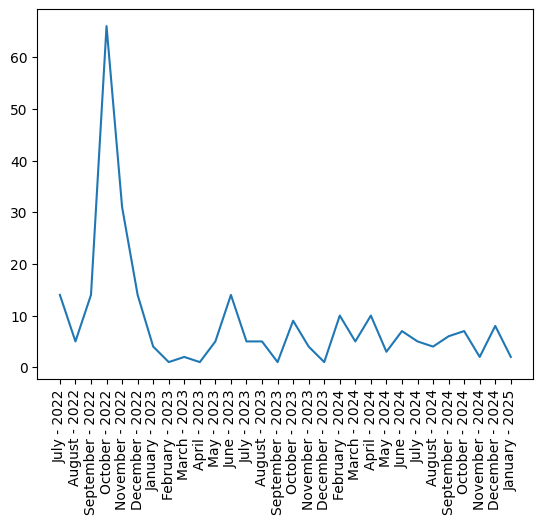

In [45]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
df['only_date'] = df['date'].dt.date
df

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2022-07-13 21:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,July,13,21,1,7,2022-07-13
1,2022-07-13 21:01:00,Vaibhav,14 contacts.vcf (file attached)\n,2022,July,13,21,1,7,2022-07-13
2,2022-07-13 21:02:00,Vaibhav,3 contacts.vcf (file attached)\n,2022,July,13,21,2,7,2022-07-13
3,2022-07-13 21:09:00,Vaibhav,Shlok & Tithi @radhe.vcf (file attached)\n,2022,July,13,21,9,7,2022-07-13
4,2022-07-13 21:09:00,Vaibhav,Digvijaysinh B. A @ Clg.vcf (file attached)\n,2022,July,13,21,9,7,2022-07-13
...,...,...,...,...,...,...,...,...,...,...
260,2024-12-25 16:28:00,Yogesh Jio,,2024,December,25,16,28,12,2024-12-25
261,2024-12-29 19:29:00,Vaibhav,<Media omitted>\n,2024,December,29,19,29,12,2024-12-29
262,2024-12-31 21:51:00,Yogesh Jio,195582\n,2024,December,31,21,51,12,2024-12-31
263,2025-01-05 11:00:00,Vaibhav,https://drive.google.com/file/d/1iW9cphdHi-2XJ...,2025,January,5,11,0,1,2025-01-05


(array([19174., 19266., 19358., 19448., 19539., 19631., 19723., 19814.,
        19905., 19997., 20089.]),
 [Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04'),
  Text(19905.0, 0, '2024-07'),
  Text(19997.0, 0, '2024-10'),
  Text(20089.0, 0, '2025-01')])

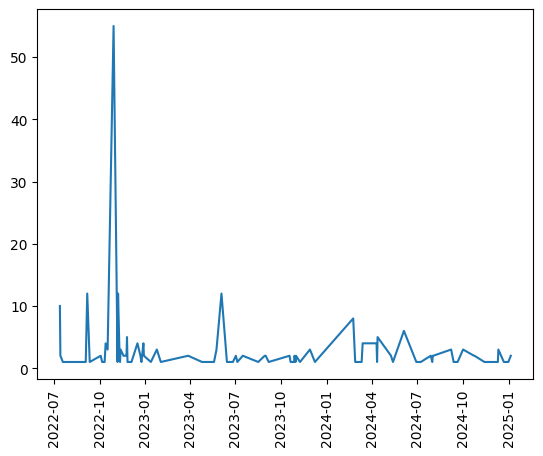

In [47]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()
plt.plot(daily_timeline['only_date'], daily_timeline['message'])
plt.xticks(rotation='vertical')

In [52]:
df['date'].dt.day_name().value_counts()
df['day_name'] = df['date'].dt.day_name()

In [59]:
period = []
for hour in df['hour']:
    if hour == 23:
        period.append(str(hour) + ' - ' + str('00'))
    elif hour == 0:
        period.append(str('00') + ' - ' + str(hour+1))
    else:
        period.append(str(hour) + ' - ' + str(hour+1))
period

['21 - 22',
 '21 - 22',
 '21 - 22',
 '21 - 22',
 '21 - 22',
 '21 - 22',
 '21 - 22',
 '21 - 22',
 '21 - 22',
 '21 - 22',
 '9 - 10',
 '9 - 10',
 '16 - 17',
 '11 - 12',
 '14 - 15',
 '20 - 21',
 '18 - 19',
 '14 - 15',
 '23 - 00',
 '11 - 12',
 '8 - 9',
 '8 - 9',
 '8 - 9',
 '8 - 9',
 '8 - 9',
 '8 - 9',
 '8 - 9',
 '8 - 9',
 '8 - 9',
 '8 - 9',
 '8 - 9',
 '8 - 9',
 '10 - 11',
 '9 - 10',
 '9 - 10',
 '9 - 10',
 '13 - 14',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '13 - 14',
 '17 - 18',
 '18 - 19',
 '13 - 14',
 '13 - 14',
 '13 - 14',
 '13 - 14',
 '13 - 14',
 '13 - 14',
 '13 - 14',
 '13 - 14',
 '13 - 14',
 '13 - 14',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17',
 '16 - 17

In [60]:
df['period'] = period

In [61]:
df

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
0,2022-07-13 21:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,July,13,21,1,7,2022-07-13,Wednesday,21 - 22
1,2022-07-13 21:01:00,Vaibhav,14 contacts.vcf (file attached)\n,2022,July,13,21,1,7,2022-07-13,Wednesday,21 - 22
2,2022-07-13 21:02:00,Vaibhav,3 contacts.vcf (file attached)\n,2022,July,13,21,2,7,2022-07-13,Wednesday,21 - 22
3,2022-07-13 21:09:00,Vaibhav,Shlok & Tithi @radhe.vcf (file attached)\n,2022,July,13,21,9,7,2022-07-13,Wednesday,21 - 22
4,2022-07-13 21:09:00,Vaibhav,Digvijaysinh B. A @ Clg.vcf (file attached)\n,2022,July,13,21,9,7,2022-07-13,Wednesday,21 - 22
...,...,...,...,...,...,...,...,...,...,...,...,...
260,2024-12-25 16:28:00,Yogesh Jio,,2024,December,25,16,28,12,2024-12-25,Wednesday,16 - 17
261,2024-12-29 19:29:00,Vaibhav,<Media omitted>\n,2024,December,29,19,29,12,2024-12-29,Sunday,19 - 20
262,2024-12-31 21:51:00,Yogesh Jio,195582\n,2024,December,31,21,51,12,2024-12-31,Tuesday,21 - 22
263,2025-01-05 11:00:00,Vaibhav,https://drive.google.com/file/d/1iW9cphdHi-2XJ...,2025,January,5,11,0,1,2025-01-05,Sunday,11 - 12


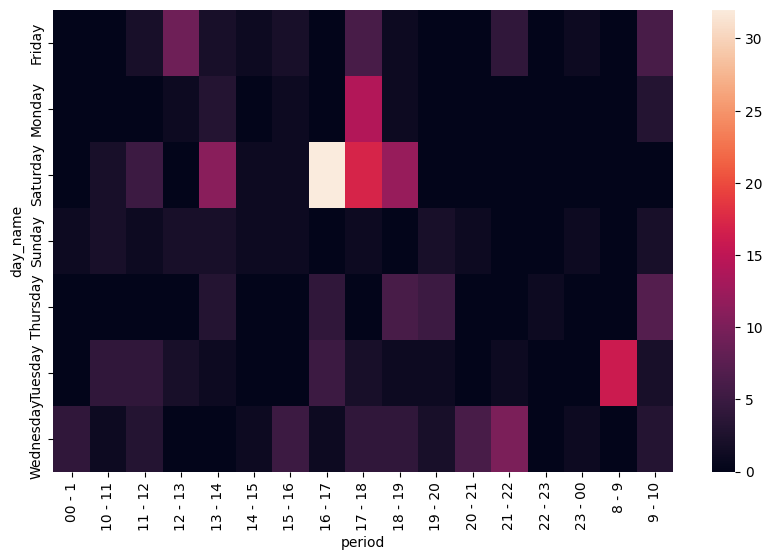

In [62]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation='vertical')
plt.show()

In [63]:
df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count')

period,00 - 1,10 - 11,11 - 12,12 - 13,13 - 14,14 - 15,15 - 16,16 - 17,17 - 18,18 - 19,19 - 20,20 - 21,21 - 22,22 - 23,23 - 00,8 - 9,9 - 10
day_name,,,,,,,,,,,,,,,,,
Friday,NaN,NaN,2.0,9.0,2.0,1.0,2.0,NaN,6.0,1.0,NaN,NaN,4.0,NaN,1.0,NaN,6.0
Monday,NaN,NaN,NaN,1.0,3.0,NaN,1.0,NaN,14.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
Saturday,NaN,2.0,5.0,NaN,11.0,1.0,1.0,32.0,17.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunday,1.0,2.0,1.0,2.0,2.0,1.0,1.0,NaN,1.0,NaN,2.0,1.0,NaN,NaN,1.0,NaN,2.0
Thursday,NaN,NaN,NaN,NaN,3.0,NaN,NaN,4.0,NaN,6.0,5.0,NaN,NaN,1.0,NaN,NaN,7.0
Tuesday,NaN,4.0,4.0,2.0,1.0,NaN,NaN,5.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,16.0,2.0
Wednesday,4.0,1.0,3.0,NaN,NaN,1.0,5.0,1.0,4.0,4.0,2.0,6.0,10.0,NaN,1.0,NaN,3.0
